# Exploratory Data Analysis

## Loading the data

In [1]:
import os
import math as m
import numpy as np                               
import pandas as pd                                
import matplotlib.pyplot as plt                   
from matplotlib.patches import Polygon
import seaborn as sns
import ipywidgets as widgets                       # interative jupyter
from IPython.display import clear_output
import itertools
from itertools import cycle
from scipy import stats                            # statistics
from dateutil.relativedelta import relativedelta

import warnings
warnings.filterwarnings("default", category=DeprecationWarning)
import datetime
from dateutil.relativedelta import relativedelta
import re

from datetime import timedelta
import warnings
warnings.simplefilter("ignore")


## Calendar 

In [2]:
calendar = pd.read_csv("../data/calendar.csv")
calendar['date']=pd.to_datetime(calendar['date'])
calendar

,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
0,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,NaN,0,0,0
1,2011-01-30,11101,Sunday,2,1,2011,d_2,NaN,NaN,NaN,NaN,0,0,0
2,2011-01-31,11101,Monday,3,1,2011,d_3,NaN,NaN,NaN,NaN,0,0,0
3,2011-02-01,11101,Tuesday,4,2,2011,d_4,NaN,NaN,NaN,NaN,1,1,0
4,2011-02-02,11101,Wednesday,5,2,2011,d_5,NaN,NaN,NaN,NaN,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1964,2016-06-15,11620,Wednesday,5,6,2016,d_1965,NaN,NaN,NaN,NaN,0,1,1
1965,2016-06-16,11620,Thursday,6,6,2016,d_1966,NaN,NaN,NaN,NaN,0,0,0
1966,2016-06-17,11620,Friday,7,6,2016,d_1967,NaN,NaN,NaN,NaN,0,0,0
1967,2016-06-18,11621,Saturday,1,6,2016,d_1968,NaN,NaN,NaN,NaN,0,0,0


* Calender has date features of weekday,month,year including wm_yr_wk which is a combination of week and year.
* The date starts from 01-29-2011 and ends on 19-06-2016 which tells that the data ranges for 5 years and 5 months.
* d feature shows all the days starting from d_1 to d_1969.
* There are certain special events and occassions with features names and types.
* It also has SNAP binary features per each state

##  Sales_train

In [3]:
sales_train = pd.read_csv("../data/sales_train_validation.csv")
sales_train

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,3,0,1,1,1,3,0,1,1
1,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,HOBBIES_1_003_CA_1_validation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,1,2,1,1,1,0,1,1,1
3,HOBBIES_1_004_CA_1_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,0,5,4,1,0,1,3,7,2
4,HOBBIES_1_005_CA_1_validation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,1,1,0,1,1,2,2,2,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30485,FOODS_3_823_WI_3_validation,FOODS_3_823,FOODS_3,FOODS,WI_3,WI,0,0,2,2,...,2,0,0,0,0,0,1,0,0,1
30486,FOODS_3_824_WI_3_validation,FOODS_3_824,FOODS_3,FOODS,WI_3,WI,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
30487,FOODS_3_825_WI_3_validation,FOODS_3_825,FOODS_3,FOODS,WI_3,WI,0,6,0,2,...,2,1,0,2,0,1,0,0,1,0
30488,FOODS_3_826_WI_3_validation,FOODS_3_826,FOODS_3,FOODS,WI_3,WI,0,0,0,0,...,0,0,1,0,0,1,0,3,1,3


* The sales data has columns for the ids of items(3049),departments(7),categories(3),stores(10) and states(3).
* The first column id is actually a combination of all the previously mentined ids and also added with a validation.
* The rest of the features are startingfrom d_1 to d_1913 which shows the number of units sold on that particular day(column) of a particular product(row).

## Sell_prices

In [4]:
sell_prices = pd.read_csv("../data/sell_prices.csv")
sell_prices

,store_id,item_id,wm_yr_wk,sell_price
0,CA_1,HOBBIES_1_001,11325,9.58
1,CA_1,HOBBIES_1_001,11326,9.58
2,CA_1,HOBBIES_1_001,11327,8.26
3,CA_1,HOBBIES_1_001,11328,8.26
4,CA_1,HOBBIES_1_001,11329,8.26
...,...,...,...,...
6841116,WI_3,FOODS_3_827,11617,1.00
6841117,WI_3,FOODS_3_827,11618,1.00
6841118,WI_3,FOODS_3_827,11619,1.00
6841119,WI_3,FOODS_3_827,11620,1.00


* The given data has prices for each product(sell_price) in a particular week of a year using id - wm_yr_wk of a particular store

## Sample_submission

In [5]:
sample_submission = pd.read_csv('../data/sample_submission.csv')
sample_submission

,id,F1,F2,F3,F4,F5,F6,F7,F8,F9,...,F19,F20,F21,F22,F23,F24,F25,F26,F27,F28
0,Total_X_0.005_validation,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,CA_X_0.005_validation,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,TX_X_0.005_validation,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,WI_X_0.005_validation,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,CA_1_X_0.005_validation,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
771115,FOODS_3_823_WI_3_0.995_evaluation,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
771116,FOODS_3_824_WI_3_0.995_evaluation,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
771117,FOODS_3_825_WI_3_0.995_evaluation,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
771118,FOODS_3_826_WI_3_0.995_evaluation,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


* There are F1 to F28 columns(28days) for which we find the uncertainty predictions.
* id feature has all the aggregate 12 levels along with uncertainty prediction interval and either validation or evaluation.
* The first half is for validation and the second half is for evaluation.
* The total number of these aggregate 12 levels are 42,840(from the competitions guide)and there are 9 uncertainty prediction intervals (0.005,0.025,0.165,0.25,0.5,0.75,0.835,0.975,0.995) and each of these for validation and evaluation, so over all 42840*9*2 = 771120 rows(ids)

## Memory Reduction

In [6]:
# Reduce the memory usage for the given datasets

def memory_reduction(df, verbose=True):

    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    start_mem = df.memory_usage().sum() / 1024**2    
    for c in df.columns:
        c_type = df[c].dtypes
        if c_type in numerics:
            Cmin = df[c].min()
            Cmax = df[c].max()
            if str(c_type)[:3] == 'int':
                if Cmin > np.iinfo(np.int8).min and Cmax < np.iinfo(np.int8).max:
                    df[c] = df[c].astype(np.int8)
                elif Cmin > np.iinfo(np.int16).min and Cmax < np.iinfo(np.int16).max:
                    df[c] = df[c].astype(np.int16)
                elif Cmin > np.iinfo(np.int32).min and Cmax < np.iinfo(np.int32).max:
                    df[c] = df[c].astype(np.int32)
                elif Cmin > np.iinfo(np.int64).min and Cmax < np.iinfo(np.int64).max:
                    df[c] = df[c].astype(np.int64)  
            else:
                if Cmin > np.finfo(np.float16).min and Cmax < np.finfo(np.float16).max:
                    df[c] = df[c].astype(np.float16)
                elif Cmin > np.finfo(np.float32).min and Cmax < np.finfo(np.float32).max:
                    df[c] = df[c].astype(np.float32)
                else:
                    df[c] = df[c].astype(np.float64)    
    end_mem = df.memory_usage().sum() / 1024**2
    if verbose: print('Memory usage decreased to {:5.2f} Mb from {:5.2f} ({:.1f}% reduction)'.format(end_mem,start_mem, 100 * (start_mem - end_mem) / start_mem))
    return df

In [7]:
calendar = memory_reduction(calendar, verbose = True)
sales_train = memory_reduction(sales_train, verbose = True)
sell_prices = memory_reduction(sell_prices, verbose = True)
sample_submission = memory_reduction(sample_submission, verbose = True)

Memory usage decreased to  0.12 Mb from  0.21 (41.9% reduction)
Memory usage decreased to 95.00 Mb from 446.40 (78.7% reduction)
Memory usage decreased to 130.48 Mb from 208.77 (37.5% reduction)
Memory usage decreased to 26.47 Mb from 170.61 (84.5% reduction)


# Visual Overview

## Visualizing random 10 different items

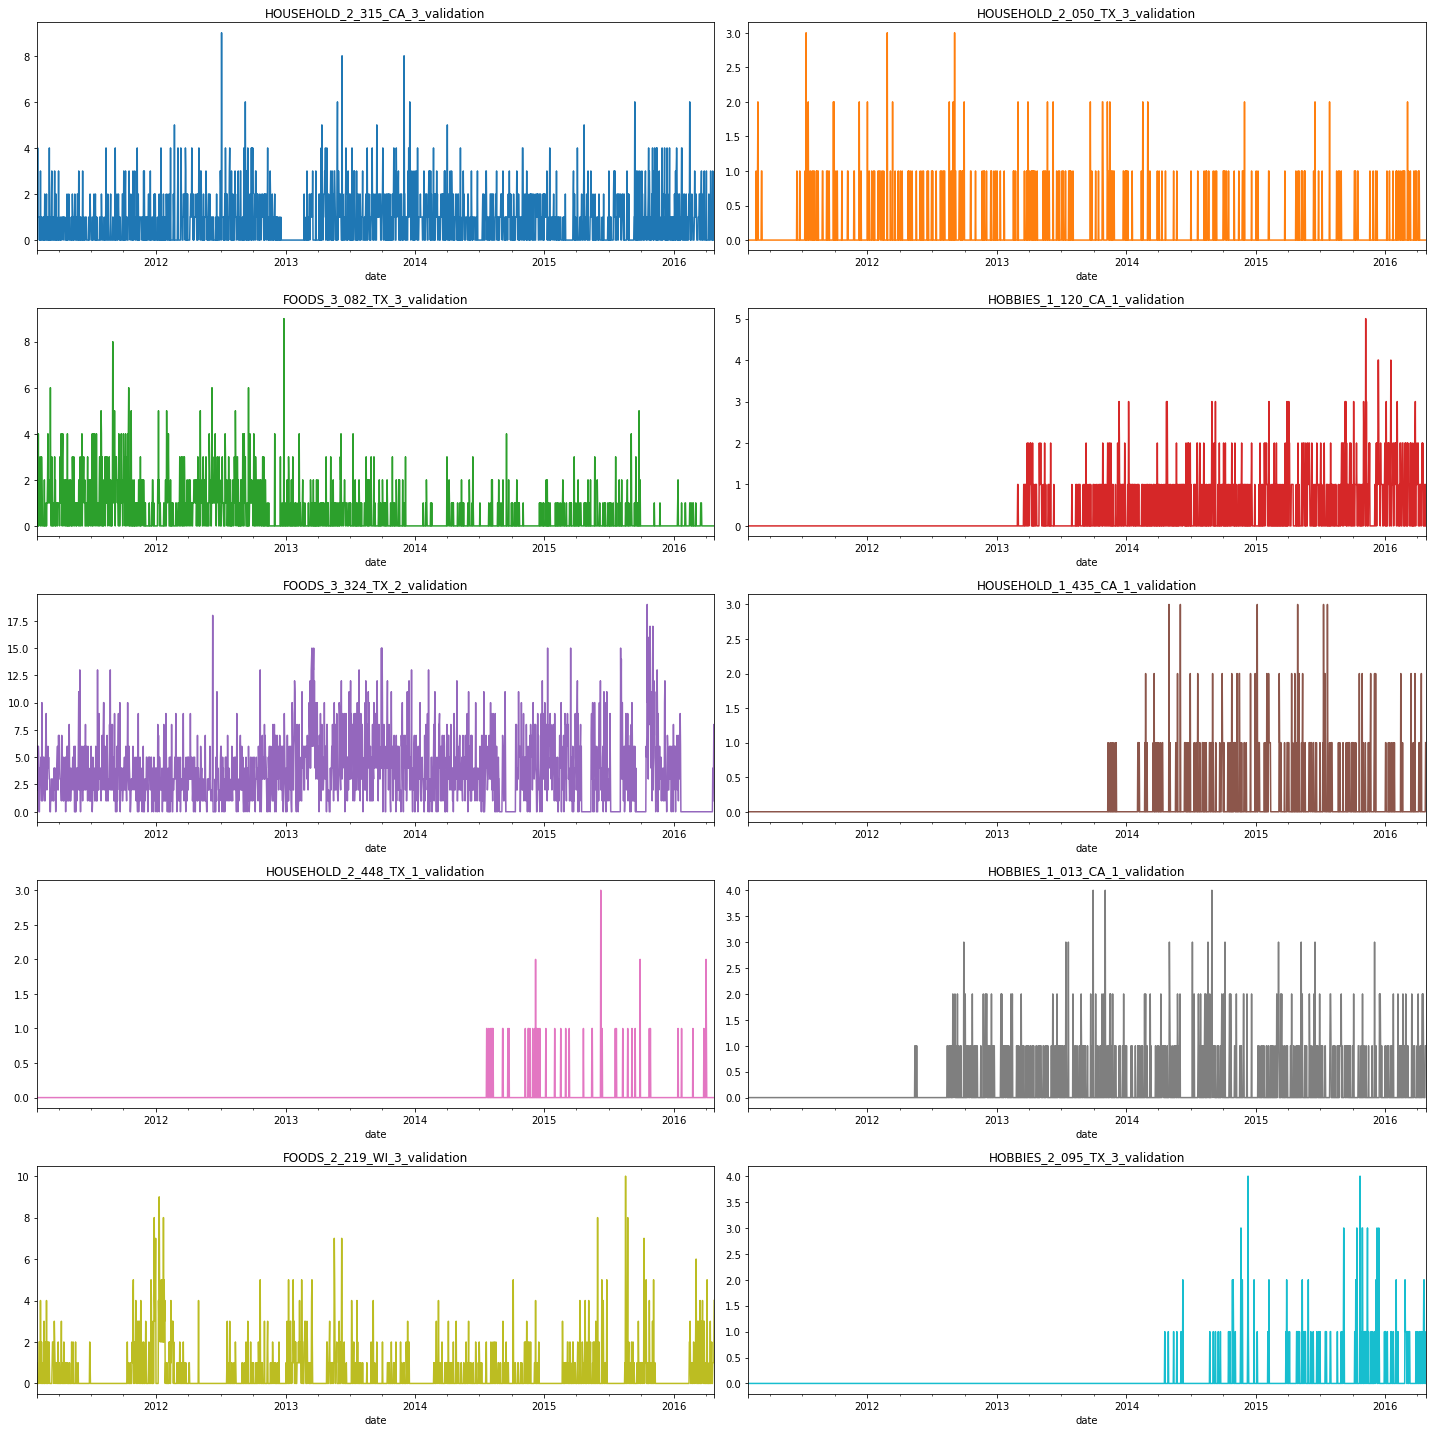

In [8]:
color_cycle=cycle(plt.rcParams['axes.prop_cycle'].by_key()['color'])
d_columns=[c for c in sales_train.columns if 'd_' in c]

random_examples = sales_train.sample(10, random_state=599) # Sample random 10 samples from the sale_train dataframe
sample_id_list = list(random_examples['id']) # Store the list of sampled id of items
random_examples = random_examples.set_index('id')[d_columns].T
random_examples = random_examples.reset_index().rename(columns={'index':'d'})
random_examples = random_examples.merge(calendar)
random_examples = random_examples.set_index('date')[sample_id_list] 


fig, axs = plt.subplots(5,2,figsize=(20,20))
axs = axs.flatten()

axs_id=0
for data in random_examples.columns:
    random_examples[data].plot(title=data, color=next(color_cycle), ax=axs[axs_id])
    axs_id+=1
plt.tight_layout()
plt.show()

## Aggregation of All States

In [9]:
# Extract d_(day)columns from the sales_train data
cols_day = sales_train.columns[sales_train.columns.str.contains('d_')].values

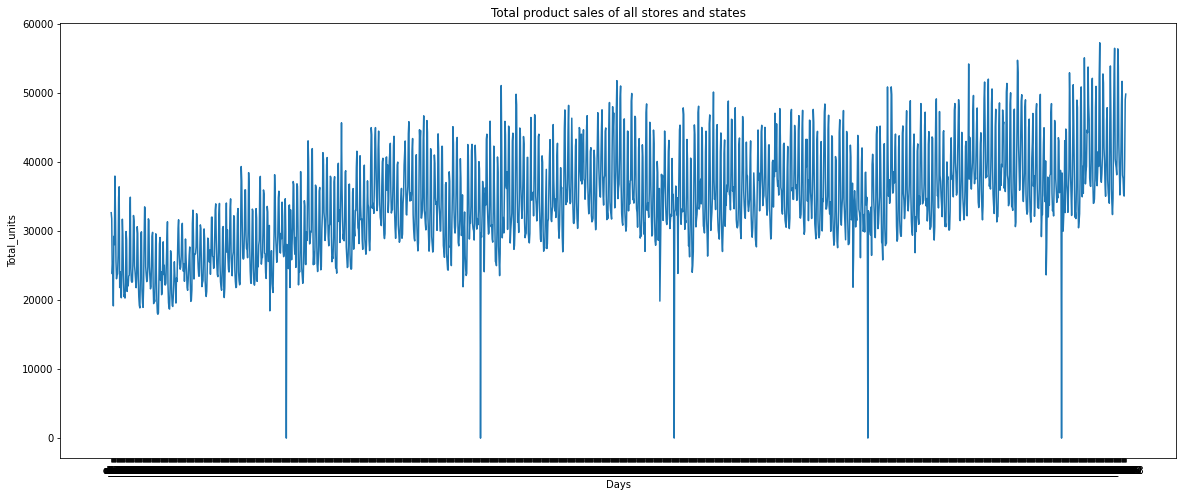

In [10]:
sales_sum = sales_train[cols_day].sum()
plt.figure(figsize=(20,8))
plt.plot(sales_sum, color=next(color_cycle))
plt.xlabel('Days')
plt.ylabel('Total_units')
plt.title("Total product sales of all stores and states")
plt.show()

* This is the summed product sales total on each day for all the days.
* The plot is actually following a nice periodic pattern with over all increase in every year except for one sudden dip to 0 on christmas day as all stores are closed on that day.

In [11]:
del sales_sum

 ## Aggregation Per State

In [12]:
sales_state = sales_train.groupby("state_id")[cols_day].sum().transpose()
d = 'd_'
d_list = []
for i in range(1,1914):
    d_1 = d+str(i)
    d_list.append(d_1)
sales_state['day'] = d_list

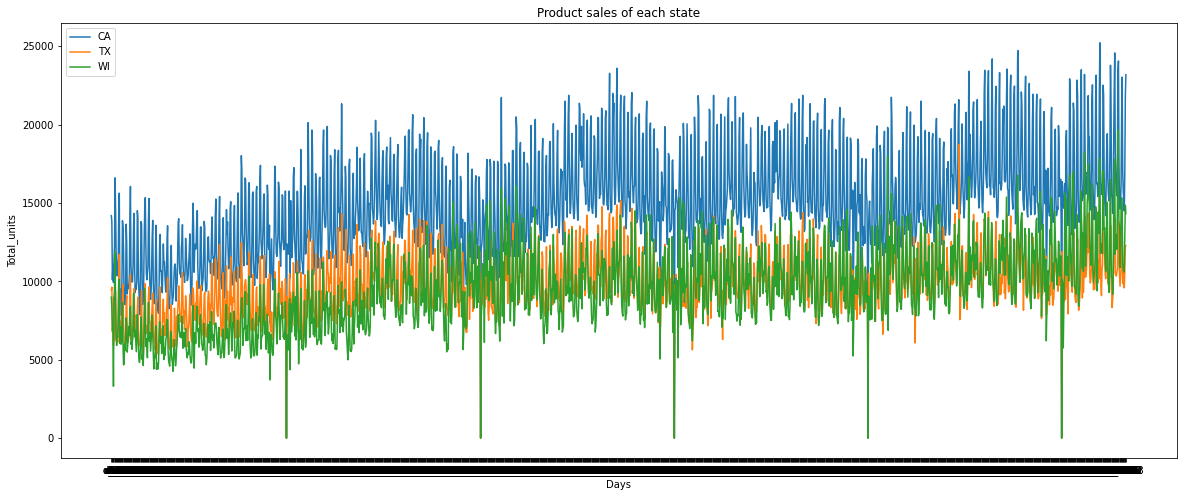

In [13]:
plt.figure(figsize=(20,8))
for i in range(0,3):
    plt.plot(sales_state['day'],sales_state.iloc[:,i:i+1])
plt.xlabel('Days')
plt.ylabel('Total_units')
plt.title("Product sales of each state")
plt.legend(['CA', 'TX','WI'])
plt.show()

* California's total sales are always higher than those of the other two states.
* In the beginning, TX had higher sales than WI, but they leveled off in the middle, and WI crossed TX at the end.
* All sales display a nice periodic pattern

In [14]:
del sales_state

 ## Aggregation Per Store

In [15]:
sales_store = sales_train.groupby("store_id")[cols_day].sum().transpose()
sales_store['day']=d_list

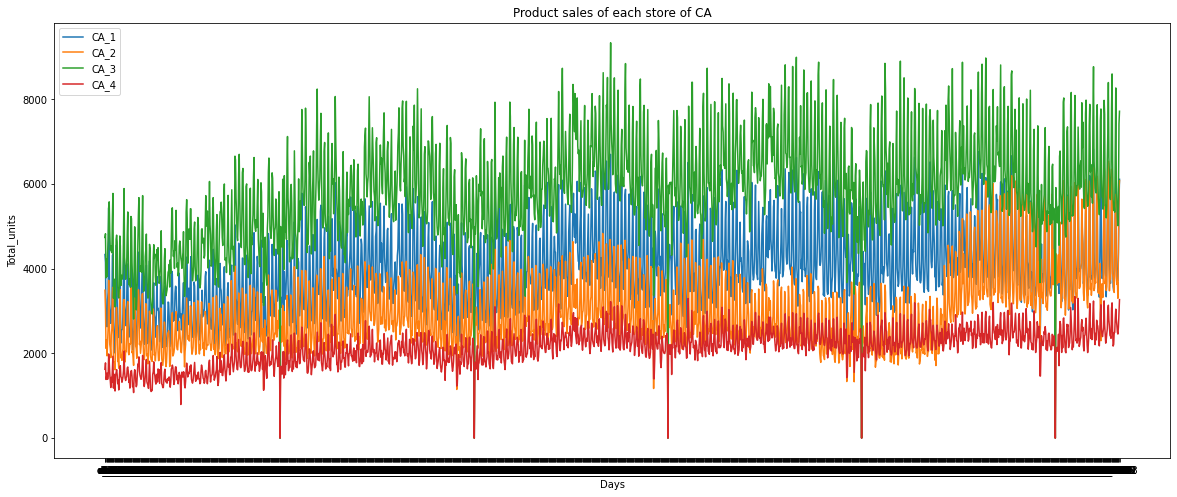

In [16]:
plt.figure(figsize=(20,8))
for i in range(0,4):
    plt.plot(sales_store['day'],sales_store.iloc[:,i:i+1])
    
plt.xlabel('Days')
plt.ylabel('Total_units')
plt.title("Product sales of each store of CA")
plt.legend(['CA_1', 'CA_2','CA_3','CA_4'])
plt.show()

* CA_3 is the highest of all four stores. It has risen over time.
* The CA_2 suddenly rises after d_1600.
* The sales of CA_4 remained relatively constant over the four years.

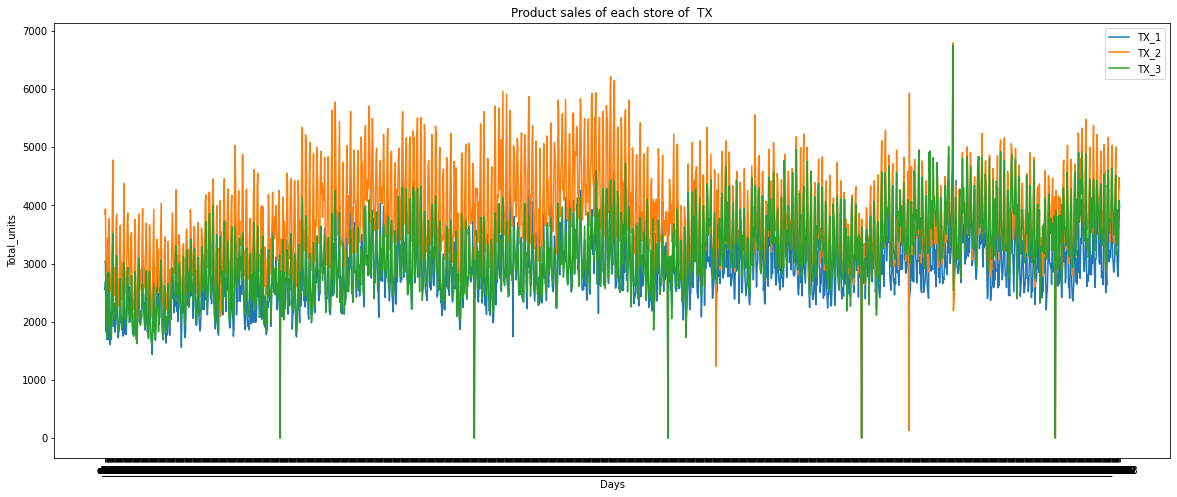

In [17]:
plt.figure(figsize=(20,8))
for i in range(4,7):
    plt.plot(sales_store['day'],sales_store.iloc[:,i:i+1])
    
plt.xlabel('Days')
plt.ylabel('Total_units')
plt.title("Product sales of each store of  TX")
plt.legend(['TX_1', 'TX_2','TX_3'])
plt.show()

* Plot shows little difference between TX_1 and TX_2. 
* At the beginning of the year, TX_2 sales were high but decreased as the year progressed.

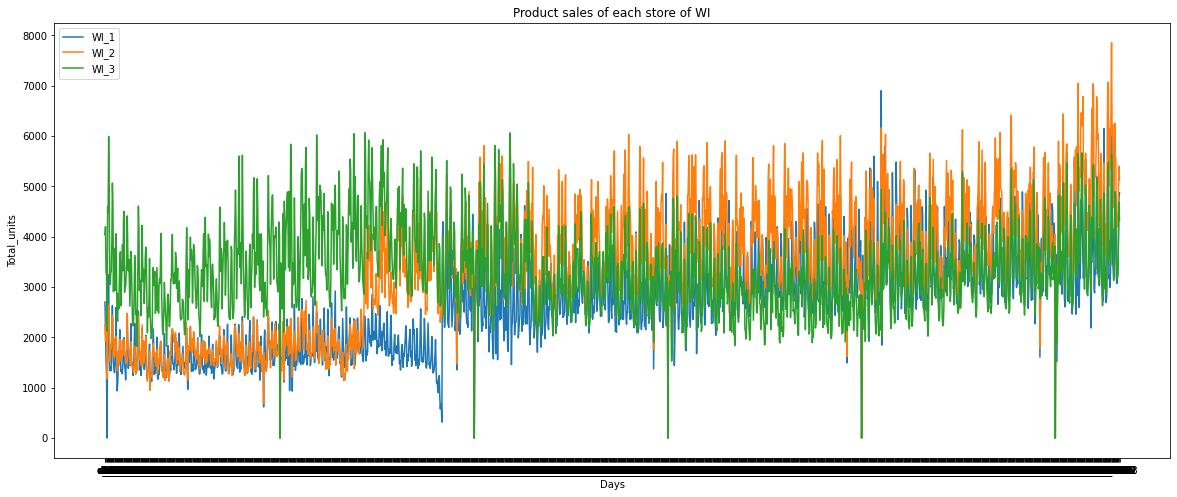

In [18]:
plt.figure(figsize=(20,8))
for i in range(7,10):
    plt.plot(sales_store['day'],sales_store.iloc[:,i:i+1])
    
plt.xlabel('Days')
plt.ylabel('Total_units')
plt.title("Product sales of each store of WI")
plt.legend(['WI_1', 'WI_2','WI_3'])
plt.show()

* WI_3 was highest initially, then WI_1 and WI2 met with WI_3 in the total sales.
* The WI_2 index rises suddenly around d_500 and the WI_1 index rises suddenly around d_600.

In [19]:
del sales_store

 ## Aggregation Per Category

In [20]:
sales_category = sales_train.groupby("cat_id")[cols_day].sum().transpose()
sales_category['day']=d_list

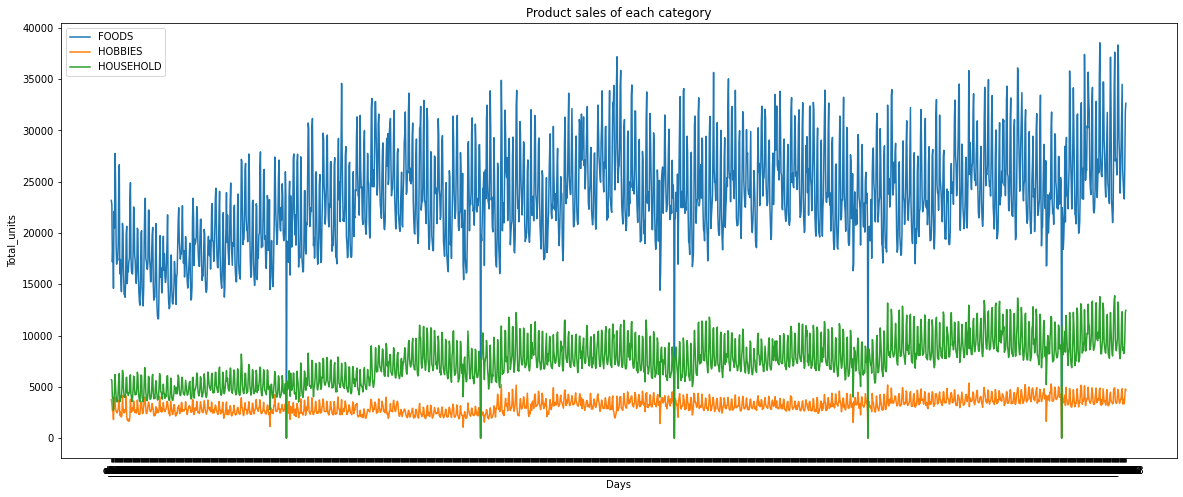

In [21]:
plt.figure(figsize=(20,8))
for i in range(0,3):
    plt.plot(sales_category['day'],sales_category.iloc[:,i:i+1])
    
plt.xlabel('Days')
plt.ylabel('Total_units')
plt.legend(['FOODS', 'HOBBIES','HOUSEHOLD'])
plt.title("Product sales of each category")
plt.show()

* Each of the three categories is well separated, with FOODS being the highest selling category.
* Throughout the years, all three categories are increasing in sales.

In [22]:
del sales_category

 ## Aggregation Per Department

In [23]:
sales_department = sales_train.groupby('dept_id')[cols_day].sum().transpose()
sales_department['day']=d_list

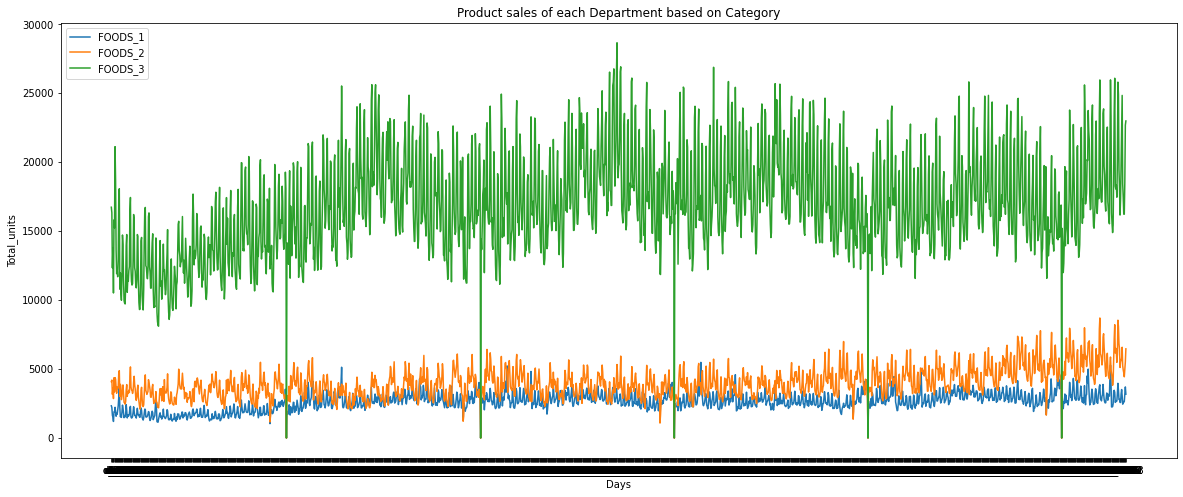

In [24]:
plt.figure(figsize=(20,8))
for i in range(0,3):
    plt.plot(sales_department['day'],sales_department.iloc[:,i:i+1])
    
plt.xlabel('Days')
plt.ylabel('Total_units')
plt.legend(['FOODS_1', 'FOODS_2','FOODS_3'])
plt.title("Product sales of each Department based on Category")
plt.show()

* All of them have a periodic pattern well separated.
* Compared to other departments, FOODS_3 has too many sales.

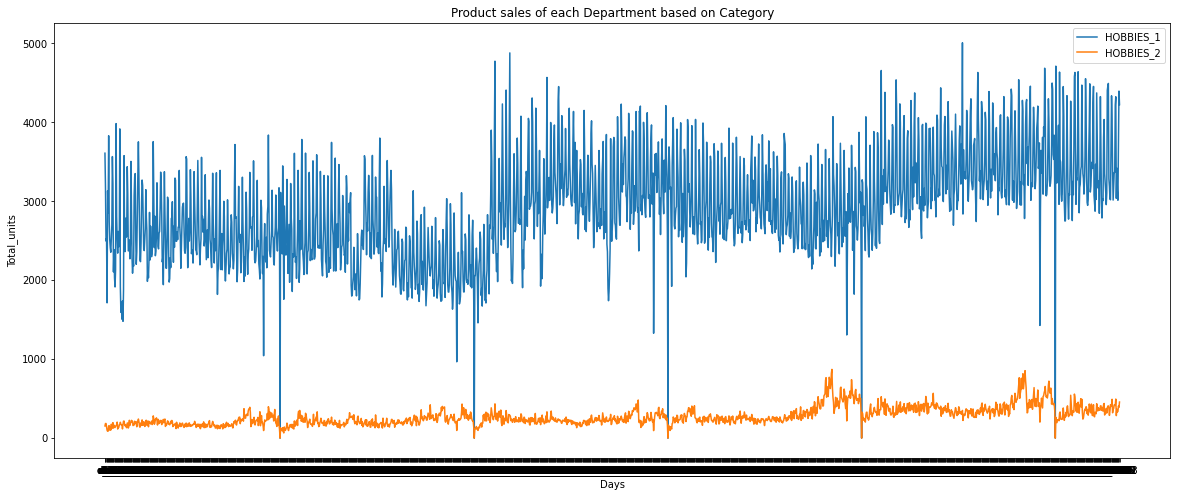

In [25]:
plt.figure(figsize=(20,8))
for i in range(3,5):
    plt.plot(sales_department['day'],sales_department.iloc[:,i:i+1])
    plt.xlabel('Days')
plt.ylabel('Total_units')
plt.legend(['HOBBIES_1', 'HOBBIES_2'])
plt.title("Product sales of each Department based on Category")
plt.show()

* Sales of HOBBIES_1 rise suddenly after d_700 while HOBBIES_2 almost remain the same all the years.
* There is a huge variation between the sales of these two deparments.

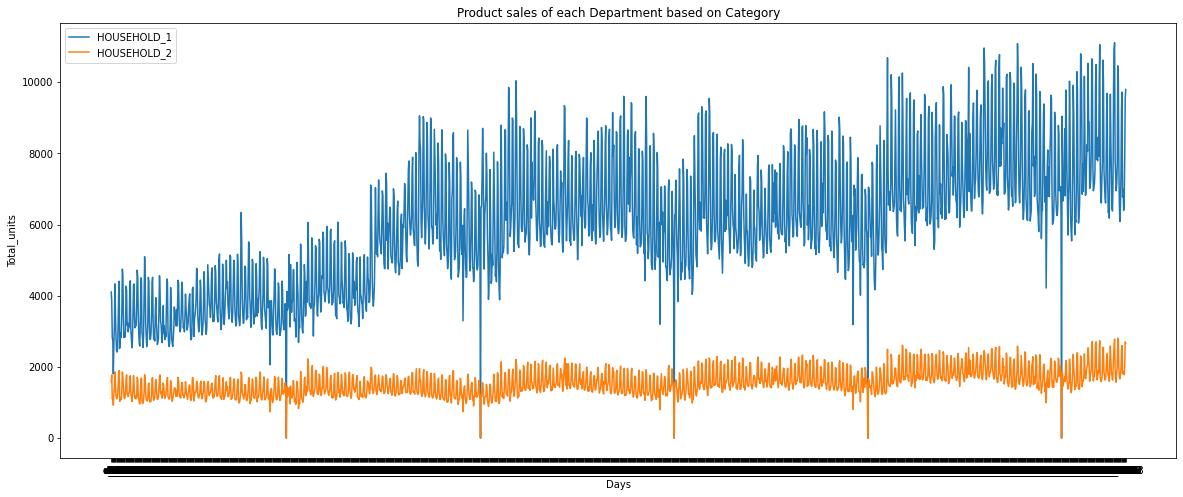

In [26]:
plt.figure(figsize=(20,8))
for i in range(5,7):
    plt.plot(sales_department['day'],sales_department.iloc[:,i:i+1])
plt.xlabel('Days')
plt.ylabel('Total_units')
plt.legend(['HOUSEHOLD_1', 'HOUSEHOLD_2'])
plt.title("Product sales of each Department based on Category")
plt.show()

* HOUSEHOLD_1 sales increase drastically.
* HOUSEHOLD_2 holds the same over the time and there is a huge gap between these two deparments.

In [27]:
del sales_department

## Melting the dataframe

The given dataframe is wide which has 1913 day features for all the products.We are converting it to long data frame.

In [28]:
d_value_list = [c for c in sales_train.columns if c.startswith("d_")] # separating day features
var_cols = [c for c in sales_train.columns if c not in d_value_list] 

# Convert the sales_train from wide to long
sales_melted = pd.melt(sales_train, id_vars = var_cols, value_vars = d_value_list)

# Change the column names
sales_melted = sales_melted.rename(columns = {"variable": "day", "value": "unit_sales"})
print(sales_melted.shape)
sales_melted.head()

(58327370, 8)


,id,item_id,dept_id,cat_id,store_id,state_id,day,unit_sales
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0
1,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0
2,HOBBIES_1_003_CA_1_validation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0
3,HOBBIES_1_004_CA_1_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0
4,HOBBIES_1_005_CA_1_validation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0


In [29]:
# Adding  a date column to the dataframe
from datetime import datetime, date, timedelta    

data_start = date(2011, 1, 29)     # data begin: Jan-29-2011
date_temp = {}                                   # map the day values to real dates
for i in list(sales_melted["day"].unique()):
    day_cnt = int(i[2:]) - 1                         
    date_ = data_start + timedelta(days = day_cnt)          # time delta: the difference between two dates
    date_temp[i] = date_

sales_melted["date"] = sales_melted["day"].map(date_temp)
sales_melted["date"] = pd.to_datetime(sales_melted["date"])  # convert to datetime

## Trend series decomposition
* https://www.statsmodels.org/devel/examples/notebooks/generated/stl_decomposition.html

`STL` (Seasonal and Trend decomposition): It uses LOESS to decompose a time series into three parts: *trend*, *season* and *low_pass*. 
`LOESS` (locally weighted smoothing), is a popular tool used in regression analysis. It creates a smooth line through a timeplot to find out the relationship between variables and foresee trends.
The key inputs into STL are:
- `season` - The length of the seasonal smoother. Must be odd.
- `trend` - The length of the trend smoother, usually around 150% of season. Must be odd and >  season.
- `low_pass` - The length of the low-pass estimation window, usually the smallest odd number larger than the periodicity of the data.

In [30]:
# creating a new dataframe with aggregated sales.
data_stl = sales_melted[["date", "unit_sales"]].set_index("date")
data_stl = data_stl.resample("D").sum()  
data_stl.head()

,unit_sales
date,
2011-01-29,32631.0
2011-01-30,31749.0
2011-01-31,23783.0
2011-02-01,25412.0
2011-02-02,19146.0


<Figure size 1800x720 with 0 Axes>

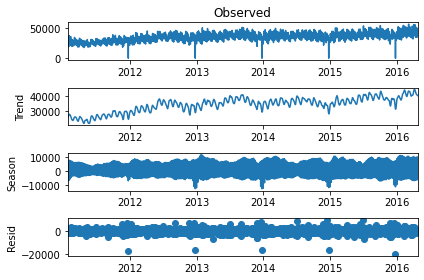

In [31]:
from statsmodels.tsa.seasonal import STL

s = STL(data_stl, seasonal = 7)     # 7: weekly seasonality 
result = s.fit()
plt.figure(figsize=(25,10))
fig = result.plot()
plt.show()

* Trend curve is quite periodic and is increasing over the time
* The season curve is almost similar around all the years.
* The residuals are also do not change much and showing same trend.

In [32]:
del data_stl

## Gathering more information on Weekly and monthly seasonality

In [33]:
sales_melted['day_week'] = sales_melted['date'].dt.weekday
sales_melted['month']= sales_melted['date'].dt.month
sales_melted['year'] = sales_melted['date'].dt.year

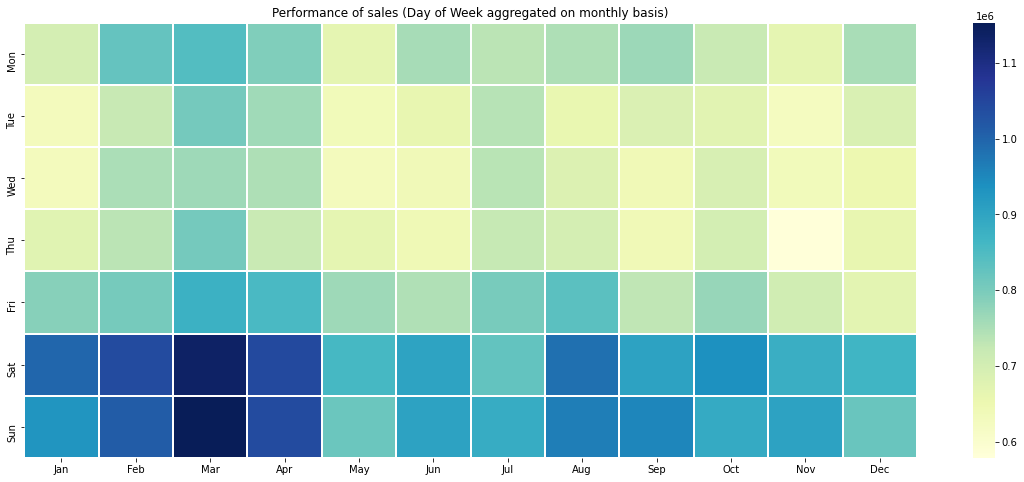

In [34]:
week_and_month = sales_melted.pivot_table(index = "day_week",columns = "month",values = "unit_sales",aggfunc = "sum")

week_and_month.columns = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
week_and_month.index = ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]
plt.figure(figsize=(20,8))
sns.heatmap(week_and_month, linewidth = 0.3, cmap="YlGnBu")
plt.title("Performance of sales (Day of Week aggregated on monthly basis)")
plt.show()

*  The sales on saturday and sunday (Weekends) are much higher than other days.
* The highest sales appeared in Feb, March and April weekends.

In [35]:
del week_and_month

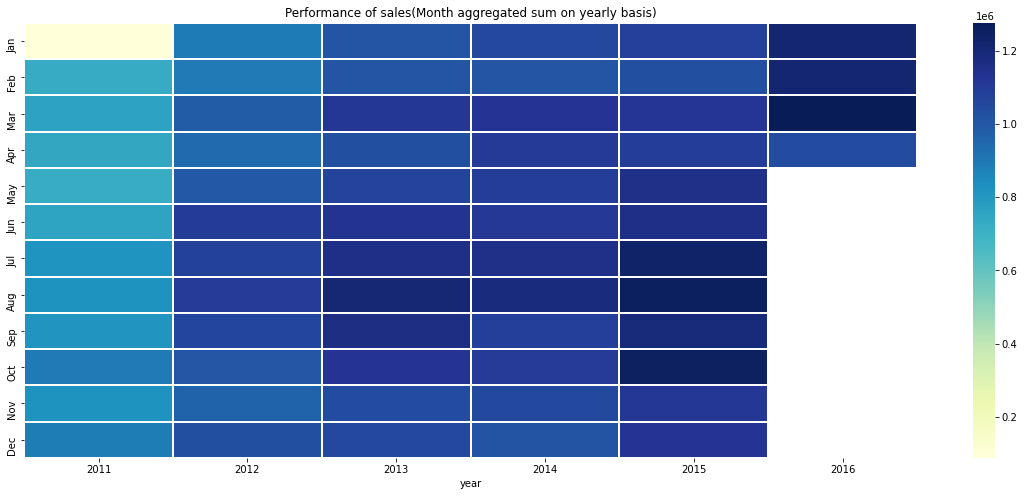

In [36]:
year_and_month = sales_melted.pivot_table(index = "month",columns = "year",values = "unit_sales",aggfunc = "sum")

year_and_month.index = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
plt.figure(figsize=(20,8))
sns.heatmap(year_and_month, linewidth = 0.2, cmap="YlGnBu")
plt.title("Performance of sales(Month aggregated sum on yearly basis)")
plt.show()

* Sales have increased every year.
* The given data is stopped in April 2016. So,the heatmap is empty afterwards.
* The mid months Jun,July,Aug and Sept have  higher sales.

In [37]:
del year_and_month

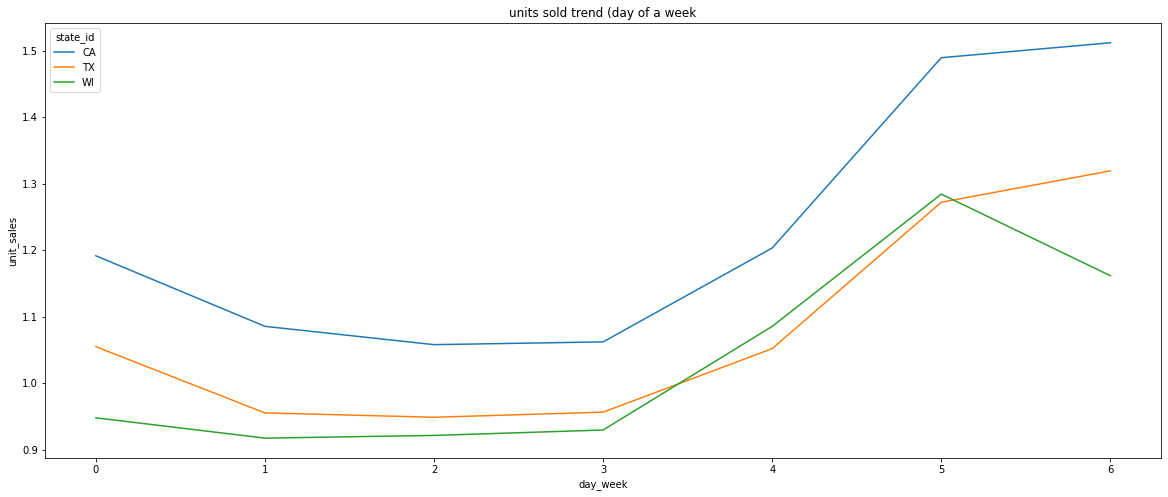

In [38]:
trend_week = sales_melted.groupby(['day_week', 'state_id']).agg({'unit_sales': 'mean'}).reset_index()
plt.figure(figsize=(20,8))
sns.lineplot(x = 'day_week', y = "unit_sales", hue = "state_id", data = trend_week)
plt.title("units sold trend (day of a week")
plt.show()

* The weekly pattern is similar for all the states, dropping till the mid-week and then rising till the weekend.
* Highest sales in the CA state.

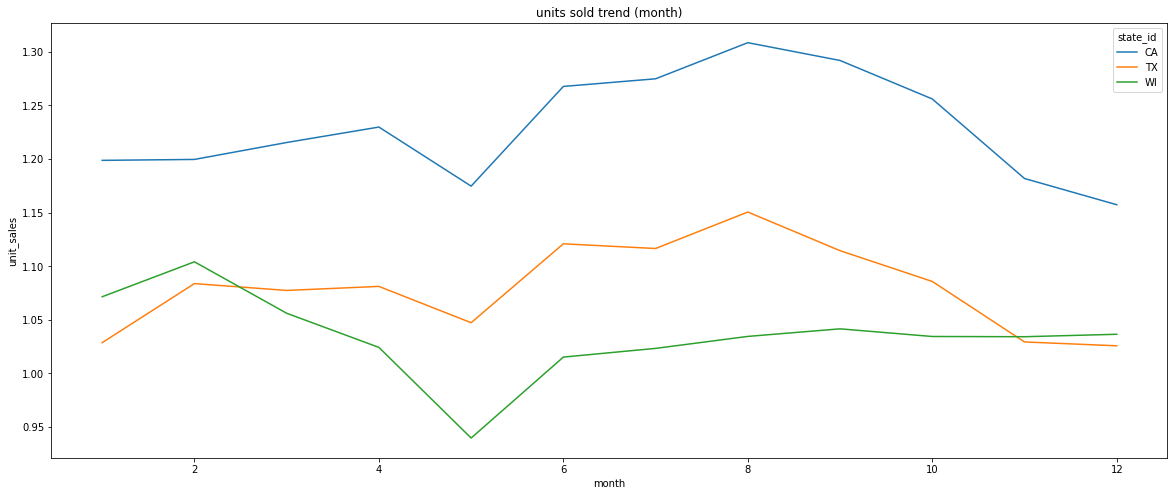

In [39]:
trend_month = sales_melted.groupby(['month', 'state_id']).agg({'unit_sales': 'mean'}).reset_index()
plt.figure(figsize=(20,8))
sns.lineplot(x = 'month', y = "unit_sales", hue = "state_id", data = trend_month)
plt.title("units sold trend (month)")
plt.show()

* The 5th month has the lowest sales and the 8th month got the highest sales.
* There is a dip in the sales of Jun month followed by rise till the August month and then decrease again.

In [40]:
del trend_week
del trend_month

## Sell_Price and Calendar Events

## Calendar Events

In [41]:
event_exist = []   # Record if an event exist or not, boolean list.
for i in range(0, len(calendar)):
    if calendar["event_name_1"].iloc[i] == calendar["event_name_1"].iloc[i]:
        event_exist.append("True")
    else:
        event_exist.append("False")
        
# Insert event_exist to calendar
calendar.insert(loc = 9, column = "event_bool_1", value = event_exist)

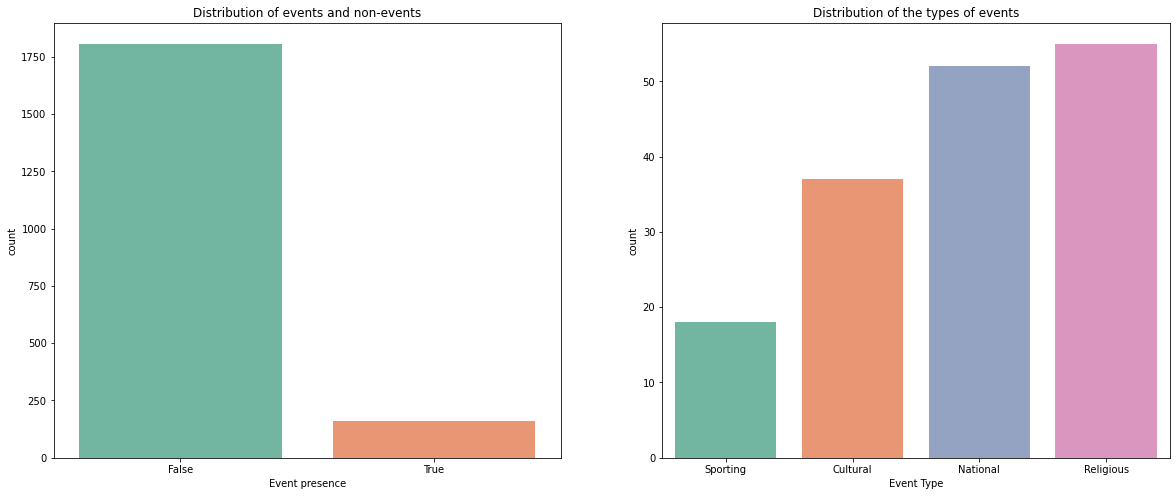

In [42]:
# Plot the distribution of event days
plt.figure(figsize=(20,8))
plt.subplot(1, 2, 1)
sns.countplot(calendar["event_bool_1"], palette = "Set2")
plt.title("Distribution of events and non-events")
plt.xlabel("Event presence")

plt.subplot(1, 2, 2)
sns.countplot(calendar["event_type_1"], palette = "Set2")
plt.title("Distribution of the types of events")
plt.xlabel("Event Type")

plt.show()

* The total number of events is only 200 in total 1913 days.
* There are 4 types of events with Religious being the highest and Sporting being the lowest.

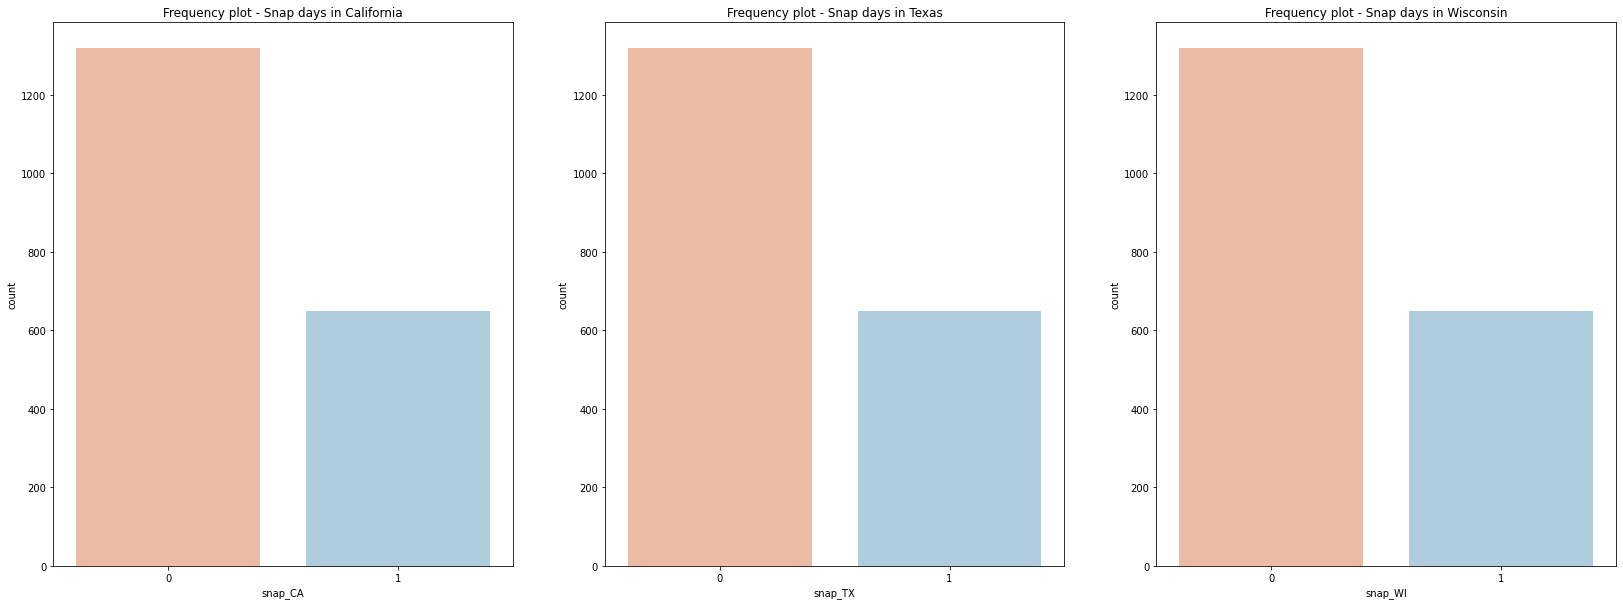

In [43]:
# plot distribution of snap days across three states
plt.figure(figsize=(28,10))
plt.subplot(1, 3, 1)
sns.countplot(x = calendar["snap_CA"], palette = "RdBu")
plt.title("Frequency plot - Snap days in California")

plt.subplot(1, 3, 2)
sns.countplot(x = calendar["snap_TX"], palette = "RdBu")
plt.title("Frequency plot - Snap days in Texas")

plt.subplot(1, 3, 3)
sns.countplot(x = calendar["snap_WI"], palette = "RdBu")
plt.title("Frequency plot - Snap days in Wisconsin")

plt.show()

* The graph above shows that all states have the same total number of SNAP days.
* To be clear, in every state, we need to know those days of the month.

In [44]:
def calen_data(item, year):
    week_1 = datetime(year, 1, 1) - pd.to_timedelta(datetime(year, 1, 1).weekday(),unit="d")
    nan_range_1 = pd.date_range(week_1, item.first_valid_index(),closed="left")
    item = item.append(pd.DataFrame(index=nan_range_1))
    
    week_2 = datetime(year, 12, 31) + pd.to_timedelta(6-datetime(year, 12, 31).weekday(),unit="d")
    nan_range_2 = pd.date_range(item.last_valid_index(), week_2,closed="right")
    item = item.append(pd.DataFrame(index=(nan_range_2))).sort_index()
    
    week_cnt = len(item)//7

    item = item.values.reshape(week_cnt,7).T
    return item

In [45]:
def graph_polygon(ax,year, item, cmap):
    ax.tick_params('x', length=0, labelsize="medium", which='major')
    ax.tick_params('y', length=0, labelsize="x-small", which='major')

    ax.pcolormesh(item, edgecolors='grey', linewidth=0.2,cmap=cmap,vmin=-1, vmax=1)
    
    # Month borders
    xticks, labels = [], []
    begin = datetime(year, 1, 1).weekday()
    for m in range(1, 13):
        start = datetime(year, m, 1)
        end = start + relativedelta(months=1, days=-1)

        y1 = start.weekday()
        y2 = end.weekday()
        x1 = (int(start.strftime("%j")) + begin - 1) // 7
        x2 = (int(end.strftime("%j")) + begin - 1) // 7

        P = [(x1, y1), (x1, 7), (x2, 7),(x2, y2 + 1), (x2 + 1, y2 + 1),
             (x2 + 1, 0),(x1 + 1, 0), (x1 + 1, y1)]
        xticks.append(x1 + (x2 - x1 + 1) / 2)
        labels.append(start.strftime("%b"))
        pg = Polygon(P, edgecolor="r", facecolor="None",
                       linewidth=1.5, zorder=20, clip_on=False)
        ax.add_artist(pg)

    ax.set_xticks(xticks)
    ax.set_xticklabels(labels)
    ax.set_yticks(0.5 + np.arange(7))
    ax.set_yticklabels(["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"])


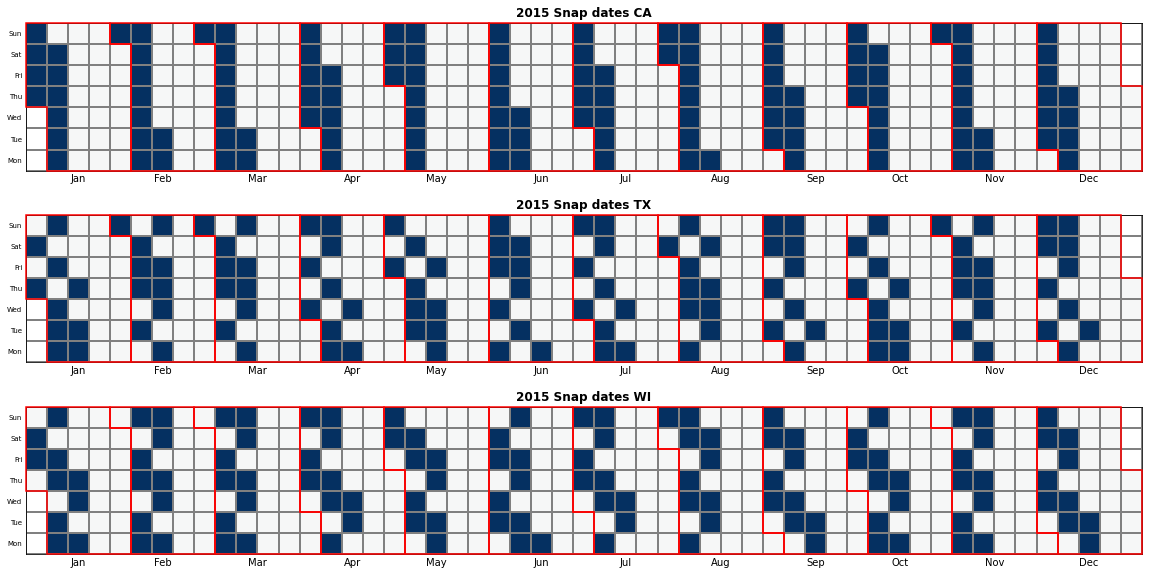

In [46]:
year= 2015
c_temp = calendar.loc[calendar["year"]==year,["snap_CA","date"]].set_index("date")
c_array = calen_data(c_temp, year)
fig = plt.figure(figsize=(20, 10))
ax = plt.subplot(311, xlim=[0,c_array.shape[1]], ylim=[0,7], frameon=True, aspect=1)
graph_polygon(ax, year, c_array,"RdBu")
ax.set_title("{} Snap dates CA".format(year), weight="semibold")

c_temp = calendar.loc[calendar["year"]==year,["snap_TX","date"]].set_index("date")
c_array = calen_data(c_temp,year)
ax = plt.subplot(312, xlim=[0,c_array.shape[1]], ylim=[0,7], frameon=True, aspect=1)
graph_polygon(ax, year, c_array,"RdBu")
ax.set_title("{} Snap dates TX".format(year), weight="semibold")

c_temp = calendar.loc[calendar["year"]==year,["snap_WI","date"]].set_index("date")
c_array = calen_data(c_temp,year)
ax = plt.subplot(313, xlim=[0,c_array.shape[1]], ylim=[0,7], frameon=True, aspect=1)
graph_polygon(ax, year, c_array,"RdBu")
ax.set_title("{} Snap dates WI".format(year), weight="semibold")
plt.show()

* SNAP has precisely 10 days in consistently for every one of the states.
* These happen on similar dates for every month in each state.
* CA has SNAP days on the initial 10 days constantly.
* TX has SNAP on 1,3,5,6,7,9,11,12,13,15 days.
* WI has SNAP on 2,3,5,6,8,9,11,12,14,15 days.
* A highlight notice is SNAP days are in the initial 15 days of the month for every one of the states.
* The above plot passes on to us that the snap days typically happen on similar dates over time.

In [47]:
del c_temp

## Sales_prices

In [48]:
sell_prices["state"] = sell_prices["store_id"].str[:2]
sell_prices["cat_id"] = sell_prices["item_id"].str[:-4]
sell_prices

,store_id,item_id,wm_yr_wk,sell_price,state,cat_id
0,CA_1,HOBBIES_1_001,11325,9.578125,CA,HOBBIES_1
1,CA_1,HOBBIES_1_001,11326,9.578125,CA,HOBBIES_1
2,CA_1,HOBBIES_1_001,11327,8.257812,CA,HOBBIES_1
3,CA_1,HOBBIES_1_001,11328,8.257812,CA,HOBBIES_1
4,CA_1,HOBBIES_1_001,11329,8.257812,CA,HOBBIES_1
...,...,...,...,...,...,...
6841116,WI_3,FOODS_3_827,11617,1.000000,WI,FOODS_3
6841117,WI_3,FOODS_3_827,11618,1.000000,WI,FOODS_3
6841118,WI_3,FOODS_3_827,11619,1.000000,WI,FOODS_3
6841119,WI_3,FOODS_3_827,11620,1.000000,WI,FOODS_3


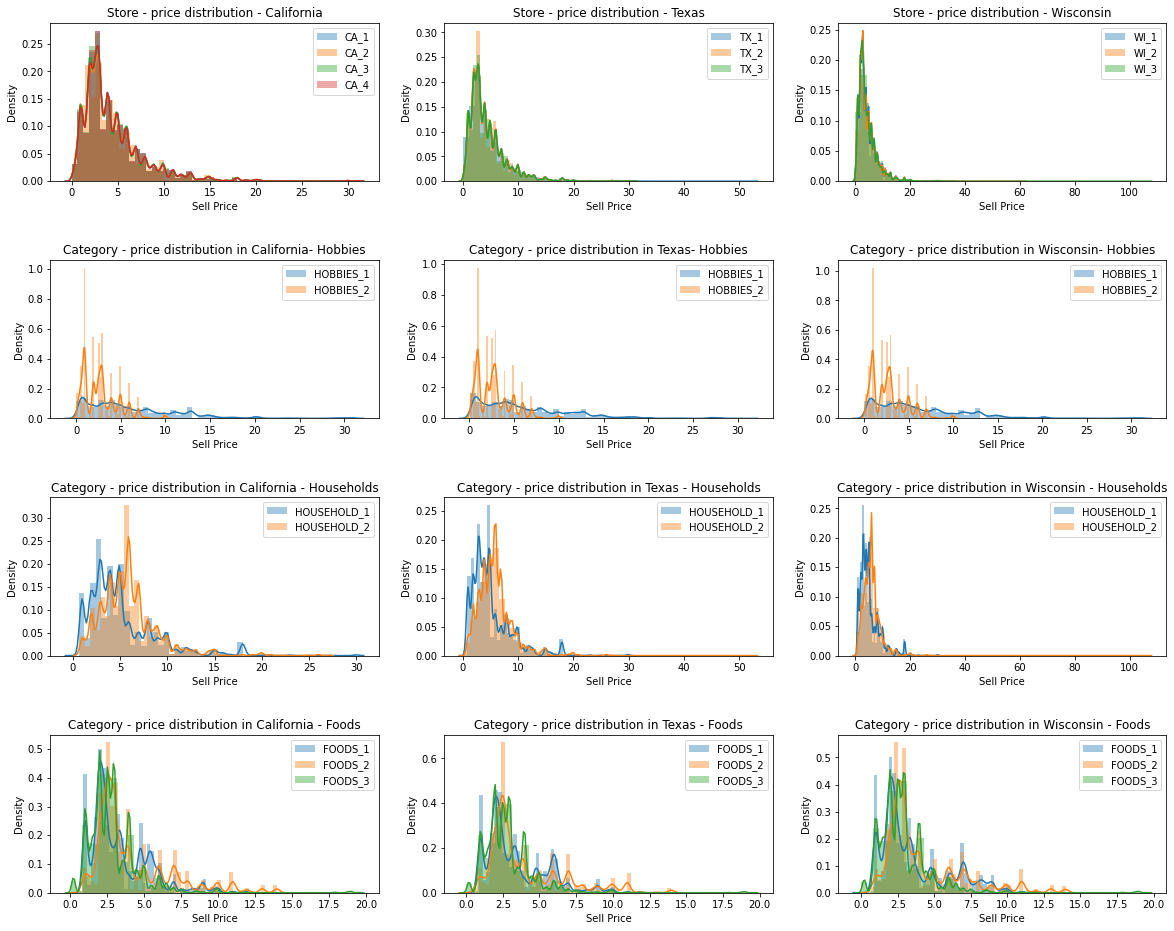

In [49]:
# Plot the distribution of various stores in a state

plt.figure(figsize = (20, 16))
plt.subplots_adjust(hspace = 0.5)

plt.subplot(4, 3, 1)
for d in ["CA_1", "CA_2", "CA_3", "CA_4"]:
    sns.distplot(sell_prices[sell_prices["store_id"] == d]["sell_price"], label = d)
    plt.legend()
    plt.xlabel("Sell Price")
    plt.title("Store - price distribution - California")

plt.subplot(4, 3, 2)
for d in ["TX_1", "TX_2", "TX_3"]:
    sns.distplot(sell_prices[sell_prices["store_id"] == d]["sell_price"], label = d)
    plt.legend()
    plt.xlabel("Sell Price")
    plt.title("Store - price distribution - Texas")

plt.subplot(4, 3, 3)
for d in ["WI_1", "WI_2", "WI_3"]:
    sns.distplot(sell_prices[sell_prices["store_id"] == d]["sell_price"], label = d)
    plt.legend()
    plt.xlabel("Sell Price")
    plt.title("Store - price distribution - Wisconsin")
    
plt.subplot(4, 3, 4)
for d in ["HOBBIES_1", "HOBBIES_2"]:
    sns.distplot(sell_prices[(sell_prices["cat_id"] == d) & (sell_prices["state"] == "CA")]["sell_price"], label = d)
    plt.legend()
    plt.xlabel("Sell Price")
    plt.title("Category - price distribution in California- Hobbies")
    
plt.subplot(4, 3, 5)
for d in ["HOBBIES_1", "HOBBIES_2"]:
    sns.distplot(sell_prices[(sell_prices["cat_id"] == d) & (sell_prices["state"] == "TX")]["sell_price"], label = d)
    plt.legend()
    plt.xlabel("Sell Price")
    plt.title("Category - price distribution in Texas- Hobbies")
    
plt.subplot(4, 3, 6)
for d in ["HOBBIES_1", "HOBBIES_2"]:
    sns.distplot(sell_prices[(sell_prices["cat_id"] == d) & (sell_prices["state"] == "WI")]["sell_price"], label = d)
    plt.legend()
    plt.xlabel("Sell Price")
    plt.title("Category - price distribution in Wisconsin- Hobbies")

plt.subplot(4, 3, 7)
for d in ["HOUSEHOLD_1", "HOUSEHOLD_2"]:
    sns.distplot(sell_prices[(sell_prices["cat_id"] == d) & (sell_prices["state"] == "CA")]["sell_price"], label = d)
    plt.legend()
    plt.xlabel("Sell Price")
    plt.title("Category - price distribution in California - Households")

plt.subplot(4, 3, 8)
for d in ["HOUSEHOLD_1", "HOUSEHOLD_2"]:
    sns.distplot(sell_prices[(sell_prices["cat_id"] == d) & (sell_prices["state"] == "TX")]["sell_price"], label = d)
    plt.legend()
    plt.xlabel("Sell Price")
    plt.title("Category - price distribution in Texas - Households")  
    
plt.subplot(4, 3, 9)
for d in ["HOUSEHOLD_1", "HOUSEHOLD_2"]:
    sns.distplot(sell_prices[(sell_prices["cat_id"] == d) & (sell_prices["state"] == "WI")]["sell_price"], label = d)
    plt.legend()
    plt.xlabel("Sell Price")
    plt.title("Category - price distribution in Wisconsin - Households")

plt.subplot(4, 3, 10)
for d in ["FOODS_1", "FOODS_2", "FOODS_3"]:
    sns.distplot(sell_prices[(sell_prices["cat_id"] == d) & (sell_prices["state"] == "CA")]["sell_price"], label = d)
    plt.legend()
    plt.xlabel("Sell Price")
    plt.title("Category - price distribution in California - Foods")
    
plt.subplot(4, 3, 11)
for d in ["FOODS_1", "FOODS_2", "FOODS_3"]:
    sns.distplot(sell_prices[(sell_prices["cat_id"] == d) & (sell_prices["state"] == "TX")]["sell_price"], label = d)
    plt.legend()
    plt.xlabel("Sell Price")
    plt.title("Category - price distribution in Texas - Foods")
    
plt.subplot(4, 3, 12)
for d in ["FOODS_1", "FOODS_2", "FOODS_3"]:
    sns.distplot(sell_prices[(sell_prices["cat_id"] == d) & (sell_prices["state"] == "WI")]["sell_price"], label = d)
    plt.legend()
    plt.xlabel("Sell Price")
    plt.title("Category - price distribution in Wisconsin - Foods")
    

# Summary of EDA 

* Understanding the given dataset.
* Reducing the sales_train size of the data by 78%.
* Actually taking a look at the time series irregularity of all of the sales.
* Analyzing the trends of aggregate sales of time series.
* From calendar, checked how events are related to the sales.
* Weekends have more sales.
* All three different regions almost have the same prices of products.
* Checked the variation with respect to SNAP days with the sales aggregation.